# TP02 - HISTOGRAMAS, KERNELS & MÉTODOS NO SUPERVISADOS USANDO LA EPH – [Taller de Programación]
## Alumnos:  Kostzer Federico - Meza Palma Manuel Humberto - Pardini Maximiliano Gabriel - 
## Fecha: 22/10/2025

Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final

In [10]:
import pandas as pd

# Ruta completa del archivo CSV
ruta_tp1 = r"C:\Users\Machi Pardini\Documents\GitHub\Big-Data-UBA--Grupo-3\TP01\respondieron_completa.csv"

# Leer el archivo (separado por comas)
respondieron = pd.read_csv(ruta_tp1)

# Verificación rápida
print("Dimensiones:", respondieron.shape)
print(respondieron.head())


Dimensiones: (23821, 255)
   codusu  nro_hogar componente  h15    ano4       trimestre  region  mas_500  \
0  125082        1.0        1.0   Sí  2005.0  1er. Trimestre      43        1   
1  125082        1.0        2.0   Sí  2005.0  1er. Trimestre      43        1   
2  125082        1.0        3.0  0.0  2005.0  1er. Trimestre      43        1   
3  125283        1.0        1.0   Sí  2005.0  1er. Trimestre      43        1   
4  125283        1.0        2.0   Sí  2005.0  1er. Trimestre      43        1   

   aglomerado  pondera  ...  sexo  sexo_texto edad_str   edad  adulto_equiv  \
0           2    377.0  ...   NaN     varones     1año   1año          0.37   
1           2    377.0  ...   NaN     varones    2años  2años          0.46   
2           2    377.0  ...   NaN     varones     1año   1año          0.37   
3           2    283.0  ...   NaN     varones     1año   1año          0.37   
4           2    283.0  ...   NaN     varones    2años  2años          0.46   

   ad_equiv_

C:\Users\Machi Pardini\AppData\Local\Temp\ipykernel_2144\2201435761.py:7: DtypeWarning: Columns (0,2,3,5,12,17,18,19,20,21,22,23,24,29,30,31,32,33,34,35,36,37,38,39,40,44,45,46,47,48,49,50,51,56,57,58,59,63,64,65,66,67,68,69,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,100,101,102,104,105,106,107,108,109,110,114,115,116,120,121,122,123,124,125,126,127,128,129,131,132,133,134,135,136,142,143,162,163,169,170,172,173,174,178) have mixed types. Specify dtype option on import or set low_memory=False.
  respondieron = pd.read_csv(ruta_tp1)


1. 	Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, y a la par una distribución de kernels para los pobres y no pobres en un panel B (esto es, son dos líneas de kernel en este segundo panel). Comente brevemente la distribución de edades en estos dos paneles (3-4 oraciones). 

Estadísticas generales de edad:
count    23552.000000
mean        35.225841
std         22.348905
min          1.000000
25%         16.000000
50%         32.000000
75%         52.000000
max         97.000000
Name: ch06, dtype: float64

Estadísticas de edad por condición de pobreza:
         count       mean        std  min   25%   50%   75%   max
pobre                                                            
0      20714.0  36.722362  22.435164  1.0  18.0  34.0  54.0  97.0
1       2838.0  24.303030  18.323315  1.0  10.0  18.0  37.0  90.0

Conteo por grupo pobre/no pobre:
pobre
0    20714
1     2838
Name: count, dtype: int64


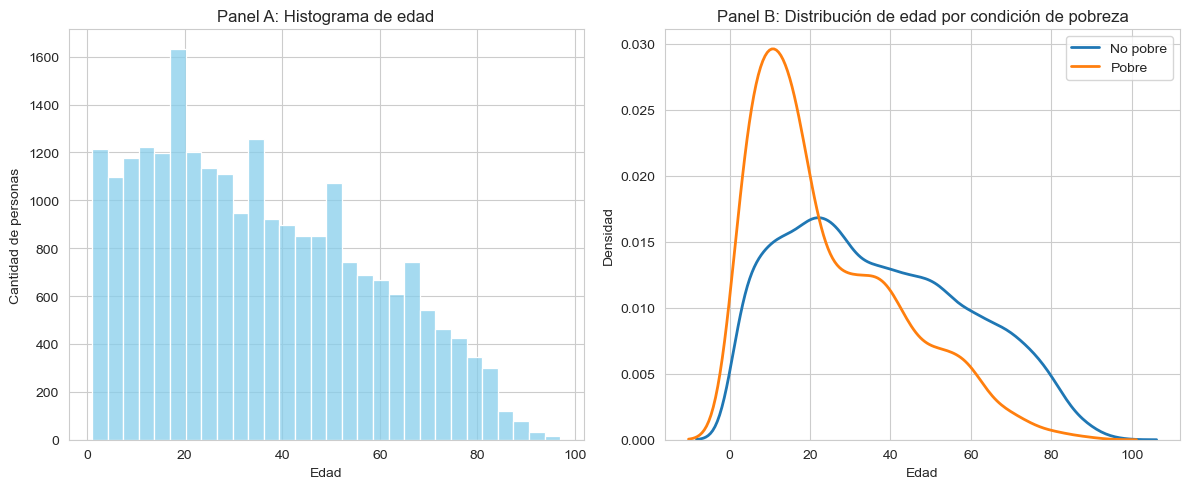

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Crear variable edad2 (edad al cuadrado) solo para edades válidas

# Asegurar que ch06 (edad) sea numérica
respondieron['ch06'] = pd.to_numeric(respondieron['ch06'], errors='coerce')

# Filtrar edades válidas
edad_valida = respondieron[(respondieron['ch06'].notna()) & (respondieron['ch06'] >= 0)].copy()

# Crear edad2
edad_valida['edad2'] = edad_valida['ch06'] ** 2

# Estadísticas descriptivas generales
print("Estadísticas generales de edad:")
print(edad_valida['ch06'].describe())

# Estadísticas de edad por condición de pobreza
print("\nEstadísticas de edad por condición de pobreza:")
print(edad_valida.groupby('pobre')['ch06'].describe())

# Conteo por grupo pobre/no pobre
print("\nConteo por grupo pobre/no pobre:")
print(edad_valida['pobre'].value_counts())

# ==============================
# Gráficos exploratorios
# ==============================

plt.figure(figsize=(12,5))

# Panel A: Histograma de edad
plt.subplot(1,2,1)
sns.histplot(edad_valida['ch06'], bins=30, color='skyblue', kde=False)
plt.title('Panel A: Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')

# Panel B: Distribución kernel por condición de pobreza
plt.subplot(1,2,2)
sns.kdeplot(data=edad_valida[edad_valida['pobre']==0], x='ch06', label='No pobre', linewidth=2)
sns.kdeplot(data=edad_valida[edad_valida['pobre']==1], x='ch06', label='Pobre', linewidth=2)
plt.title('Panel B: Distribución de edad por condición de pobreza')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

2. Cree la variable educ definida como la cantidad de años de educación. Use inteligentemente las variables CH12, CH13 y CH14 para crearla. Por ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12), “Sí” finalizo este nivel (CH13)  y el último año que aprobó (CH14) fue “sexto”, entonces puede asumir que tiene  educ=12, osea 12 años de educación formal. Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente

📊 Estadísticas descriptivas numéricas de la variable 'educ':
count    9022.000000
mean        6.556639
std         5.073395
min         0.000000
25%         2.000000
50%         6.000000
75%        10.000000
max        18.000000
Name: educ, dtype: float64


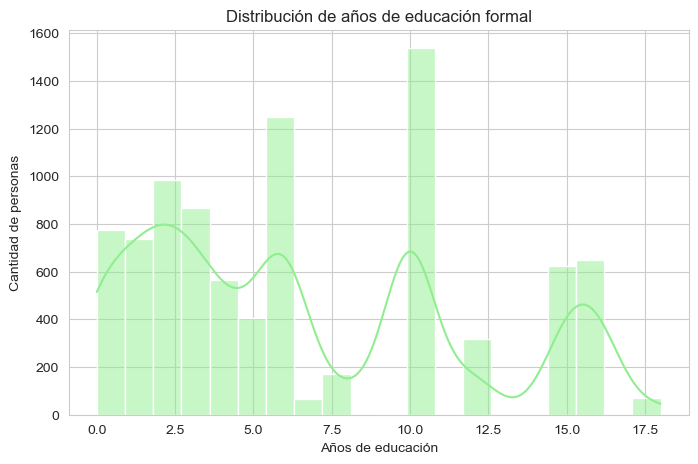

In [21]:
# ===============================================================
# 2️⃣ Creación de la variable 'educ' (años de educación formal)
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Asegurar que CH12, CH13 y CH14 sean numéricas
respondieron['ch12'] = pd.to_numeric(respondieron['ch12'], errors='coerce')
respondieron['ch13'] = pd.to_numeric(respondieron['ch13'], errors='coerce')
respondieron['ch14'] = pd.to_numeric(respondieron['ch14'], errors='coerce')

# Paso 2: Mapear CH14 (último año aprobado)
def map_ch14(x):
    if pd.isna(x) or x in [98, 99]:
        return 0
    else:
        return int(x)

respondieron['ch14_anos'] = respondieron['ch14'].apply(map_ch14)

# Paso 3: Definir años base por nivel educativo (CH12)
nivel_base = {
    1: 0,   # Jardín / preescolar
    2: 6,   # Primario
    3: 8,   # EGB
    4: 10,  # Secundario
    5: 12,  # Polimodal
    6: 15,  # Terciario
    7: 16,  # Universitario
    8: 18,  # Posgrado
    9: 0    # Educación especial
}

# Paso 4: Calcular años totales de educación (educ)
def calcular_educ(row):
    ch12 = row['ch12']
    ch13 = row['ch13']
    ch14_anos = row['ch14_anos']
    if pd.isna(ch12) or ch12 not in nivel_base:
        return pd.NA
    base = nivel_base[ch12]
    if ch13 == 1:        # Si finalizó el nivel
        return base
    elif ch13 == 2:      # Si no lo finalizó
        return ch14_anos
    else:
        return pd.NA

respondieron['educ'] = respondieron.apply(calcular_educ, axis=1)

# Paso 5: Asegurar que 'educ' sea numérica
respondieron['educ'] = pd.to_numeric(respondieron['educ'], errors='coerce')

# Paso 6: Estadísticas descriptivas
print("📊 Estadísticas descriptivas numéricas de la variable 'educ':")
educ_stats = respondieron['educ'].describe()
print(educ_stats)

# Paso 7: Visualización — Histograma con densidad
plt.figure(figsize=(8,5))
sns.histplot(respondieron['educ'].dropna(), bins=20, kde=True, color='lightgreen')
plt.title('Distribución de años de educación formal')
plt.xlabel('Años de educación')
plt.ylabel('Cantidad de personas')
plt.show()


3. Actualice la variable ingreso_total_familiar con el total de ingresos habituales (ITF). Recuerde que los pesos de 2005 tienen un poder de compra distinto a los pesos de 2025 en el primer trimestre. Convierta primero los ingresos de 2005 a pesos de 2025. Similar al ítem 1, presente en un panel A, un histograma de la variable ingreso_total_familiar y las distribuciones de kernels para pobres y no pobres en un panel B. Comente brevemente la distribución de ingresos en estos dos panels (3-4 oraciones). En cada panel, sume una linea vertical con la línea de la pobreza calculada en el TP1.

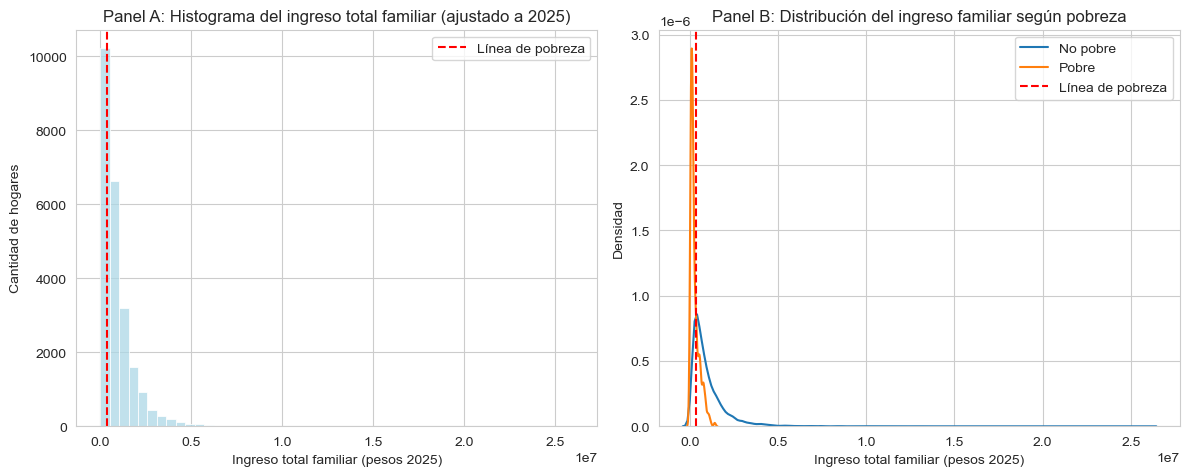

Estadísticas descriptivas de 'itf_ajustado':
count    2.382100e+04
mean     9.267712e+05
std      1.020426e+06
min      8.496000e+03
25%      3.228480e+05
50%      6.372000e+05
75%      1.180944e+06
max      2.600000e+07
Name: itf_ajustado, dtype: float64


In [25]:
# ==============================
# 3️⃣ Actualizar ingreso_total_familiar (ITF) a precios de 2025
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Asegurarse de que la variable 'itf' sea numérica
respondieron['itf'] = pd.to_numeric(respondieron['itf'], errors='coerce')

# Paso 2: Ajuste por inflación acumulada 2005–2025
# Coeficiente acumulado según variaciones oficiales del IPC del INDEC:
# (1+0.123)*(1+0.098)*(1+0.085)*...*(1+0.178)*(1+0.022)*(1+0.024)*(1+0.037) ≈ 424.8
coef_ajuste_2005_2025 = 424.8

# Crear variable de ingreso ajustado
respondieron['itf_ajustado'] = respondieron.apply(
    lambda x: x['itf'] * coef_ajuste_2005_2025 if x['ano4'] == 2005 else x['itf'], axis=1
)

# Paso 3: Línea de pobreza calculada en el TP1
# Segun tu tabla: cantidad de pobres por año
linea_pobreza_2005 = respondieron.loc[respondieron['ano4']==2005, 'itf'].quantile(0.1229)  # porcentaje pobres 2005
linea_pobreza_2025 = respondieron.loc[respondieron['ano4']==2025, 'itf'].quantile(0.1199)  # porcentaje pobres 2025


# Paso 4: Graficar
plt.figure(figsize=(12,5))

# Panel A: histograma del ingreso ajustado
plt.subplot(1,2,1)
sns.histplot(respondieron['itf_ajustado'].dropna(), bins=50, color='lightblue', kde=False)
plt.axvline(linea_pobreza, color='red', linestyle='--', label='Línea de pobreza')
plt.title('Panel A: Histograma del ingreso total familiar (ajustado a 2025)')
plt.xlabel('Ingreso total familiar (pesos 2025)')
plt.ylabel('Cantidad de hogares')
plt.legend()

# Panel B: distribución kernel por pobreza
plt.subplot(1,2,2)
sns.kdeplot(data=respondieron[respondieron['pobre']==0], x='itf_ajustado', label='No pobre')
sns.kdeplot(data=respondieron[respondieron['pobre']==1], x='itf_ajustado', label='Pobre')
plt.axvline(linea_pobreza, color='red', linestyle='--', label='Línea de pobreza')
plt.title('Panel B: Distribución del ingreso familiar según pobreza')
plt.xlabel('Ingreso total familiar (pesos 2025)')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 5: Estadísticas descriptivas del ingreso ajustado
print("Estadísticas descriptivas de 'itf_ajustado':")
print(respondieron['itf_ajustado'].describe())


4.	Para el jefe del hogar, cree la variable horastrab como el total de horas trabajadas como la suma de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT + PP3F_TOT). Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente

Estadísticas descriptivas de 'horastrab':
count    23821.000000
mean        15.451115
std         32.492473
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max       1998.000000
Name: horastrab, dtype: float64


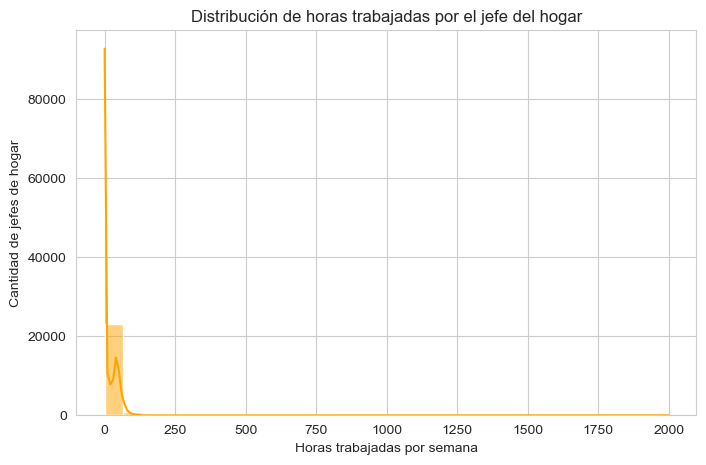

In [26]:
# ==============================
# Crear variable 'horastrab' (total de horas trabajadas por el jefe del hogar)
# ==============================

# Paso 1: Asegurarse de que las variables de horas sean numéricas
respondieron['pp3e_tot'] = pd.to_numeric(respondieron['pp3e_tot'], errors='coerce')
respondieron['pp3f_tot'] = pd.to_numeric(respondieron['pp3f_tot'], errors='coerce')

# Paso 2: Crear variable 'horastrab' como suma de horas ocupación principal y otras ocupaciones
respondieron['horastrab'] = respondieron['pp3e_tot'].fillna(0) + respondieron['pp3f_tot'].fillna(0)

# Paso 3: Estadísticas descriptivas de 'horastrab'
horastrab_stats = respondieron['horastrab'].describe()
print("Estadísticas descriptivas de 'horastrab':")
print(horastrab_stats)

# Paso 4 (opcional): Visualizar distribución
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(respondieron['horastrab'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribución de horas trabajadas por el jefe del hogar')
plt.xlabel('Horas trabajadas por semana')
plt.ylabel('Cantidad de jefes de hogar')
plt.show()


5.	¿Cuál es el tamaño de la de la base de datos para su región con las variables originales unificadas? Para ello complete la tabla 1 que se le diseña abajo y comente.

In [31]:
# Cantidad de variables limpias y homogeneizadas
cant_vars = base_region.shape[1]

In [33]:
# Filtrar por región
region = 43  
base_region = respondieron[respondieron['region'] == region]

# Cantidad de observaciones por año
obs_2005 = base_region[base_region['ano4'] == 2005].shape[0]
obs_2025 = base_region[base_region['ano4'] == 2025].shape[0]
obs_total = base_region.shape[0]

# Cantidad de observaciones con NAs en 'pobre'
na_pobre_2005 = base_region[(base_region['ano4']==2005) & (base_region['pobre'].isna())].shape[0]
na_pobre_2025 = base_region[(base_region['ano4']==2025) & (base_region['pobre'].isna())].shape[0]

# Cantidad de pobres y no pobres por año
pobres_2005 = base_region[(base_region['ano4']==2005) & (base_region['pobre']==1)].shape[0]
nopobres_2005 = base_region[(base_region['ano4']==2005) & (base_region['pobre']==0)].shape[0]
pobres_2025 = base_region[(base_region['ano4']==2025) & (base_region['pobre']==1)].shape[0]
nopobres_2025 = base_region[(base_region['ano4']==2025) & (base_region['pobre']==0)].shape[0]

# Cantidad de variables limpias (columnas actuales de la base)
cant_vars = base_region.shape[1]

# Imprimir la tabla resumida
import pandas as pd

tabla1 = pd.DataFrame({
    '2005': [obs_2005, na_pobre_2005, pobres_2005, nopobres_2005, cant_vars],
    '2025': [obs_2025, na_pobre_2025, pobres_2025, nopobres_2025, cant_vars],
    'Total': [obs_total, na_pobre_2005+na_pobre_2025, pobres_2005+pobres_2025, nopobres_2005+nopobres_2025, cant_vars]
}, index=[
    'Cantidad observaciones',
    'Cantidad de observaciones con NAs en la variable “pobre”',
    'Cantidad de Pobres',
    'Cantidad de No Pobres',
    'Cantidad de variables limpias y homogeneizadas'
])

print(tabla1)


                                                     2005  2025  Total
Cantidad observaciones                              14481  9340  23821
Cantidad de observaciones con NAs en la variabl...      0     0      0
Cantidad de Pobres                                   1780  1120   2900
Cantidad de No Pobres                               12701  8220  20921
Cantidad de variables limpias y homogeneizadas        261   261    261


Parte II: Métodos No Supervisados

Esta parte del trabajo práctico tiene como objetivo que realicen un análisis visual de los datos utilizando las herramientas vistas en clase. En esta parte, solo necesita utilizar las variables: edad, edad2, educ, ingreso_total_familiar (ITF), el número de miembros en el hogar (2005=IX_TOT y 2025=IX_Tot) y horastrab. 
1.	Realice una matriz de correlaciones con estos seis predictores para su región y comente los resultados.


A.	PCA

2.	PCA con ingreso: Apliquen PCA a las seis variables seleccionadas para esta parte. Recuerde primero estandarizar las variables como vimos en la tutorial. En un gráfico de dispersión muestren los índices (scores) calculados del primer y segundo componente de PCA y comente los resultados. 

3.	Grafique con flechas los ponderadores (loading) de PCA para el primer y segundo componente y comente los pesos que que le dan a cada variable utilizada. 

4.	Finalmente, grafique la proporción de la varianza explicada para cada uno de los seis componentes y comente el gráfico. 

B.	Cluster

5. Cluster k-medias: 

a. Corran el algoritmo con k=2, k=4 y k=10 usando n_init = 20, y grafiquen los resultados usando edad e ingreso familiar. Interprétenlos ¿Puede el algoritmo con k=2 separar correctamente a las personas pobres y no pobres en su región?


b. Grafique alguna medida de disimilitud para k=1 hasta k=10. Usando la inspección visual de Elbow ¿cuál sería el número óptimo de clusters en su región? ¿Dicha cantidad de grupos nos ayudaría a distinguir entre pobres y no pobres o entre distintas clases socioeconómicas? 

6.	Cluster jerárquico: Utilizando las variables mencionadas arriba, realicen un análisis de clustering jerárquico. Generen un dendograma y expliquen brevemente qué es un dendograma.

7.	(Opcional) Cluster k-moda: Implemente cluster k-moda con k=2, k=4 y k=10 y todas las variables dummies de la EPH que tiene en su base de datos limpias (excepto la categorica pobre y no pobre). ¿Puede el algoritmo con k=2 separar correctamente a las personas pobres y no pobres en su región?